<a href="https://colab.research.google.com/github/SonOf1998/COVID-19_detection_in_lungs/blob/nandor_workspace/COVIDDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from urllib.request import urlretrieve
import requests
import zipfile
import shutil
import random


In [2]:
def rename_all_files_in_folder_with_indices(dir_full_path, files_base_name):
  for idx, file in enumerate(os.listdir(dir_full_path)):
    splitf = file.split('.')
    os.rename(os.path.join(dir_full_path, file), os.path.join(dir_full_path, '{}{:04d}.{}'.format(files_base_name, idx, splitf[-1])))

In [3]:
url = 'https://github.com/muhammedtalo/COVID-19/archive/master.zip'
urlretrieve(url,"master.zip")

local_zip = 'master.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

if os.path.exists("master.zip"):
  os.remove("master.zip")

In [4]:
if os.path.exists(os.path.join('COVID-19-master', 'DarkCovidNet  for binary classes.ipynb')):
  os.remove(os.path.join('COVID-19-master', 'DarkCovidNet  for binary classes.ipynb'))
if os.path.exists(os.path.join('COVID-19-master', 'DarkCovidNet model for three classes.ipynb')):
  os.remove(os.path.join('COVID-19-master', 'DarkCovidNet model for three classes.ipynb'))
if os.path.exists(os.path.join('COVID-19-master', 'README.md')):
  os.remove(os.path.join('COVID-19-master', 'README.md'))

In [5]:
destination = os.getcwd()

source = os.path.join('COVID-19-master', 'X-Ray Image DataSet')
shutil.move(source, destination)

os.rmdir('COVID-19-master')

In [6]:
base_dir = 'train_image_dataset'
os.rename('X-Ray Image DataSet', base_dir)

os.rename(os.path.join(base_dir, 'Covid-19'), os.path.join(base_dir, 'covid_19'))
os.rename(os.path.join(base_dir, 'No_findings'), os.path.join(base_dir, 'no_findings'))
os.rename(os.path.join(base_dir, 'Pneumonia'), os.path.join(base_dir, 'pneumonia'))

rename_all_files_in_folder_with_indices(os.path.join(base_dir, 'covid_19'), 'covid_')
rename_all_files_in_folder_with_indices(os.path.join(base_dir, 'no_findings'), 'no_findings_')
rename_all_files_in_folder_with_indices(os.path.join(base_dir, 'pneumonia'), 'pneumonia_')

In [7]:
base_test_dir = 'test_image_dataset'
os.mkdir(base_test_dir)
os.mkdir(os.path.join(base_test_dir, 'covid_19'))
os.mkdir(os.path.join(base_test_dir, 'no_findings'))
os.mkdir(os.path.join(base_test_dir, 'pneumonia'))

In [8]:
test_split = 0.1

In [9]:
random.seed(1)

test_split = 0.1
current_directory = os.path.join(base_dir, 'covid_19')
new_directory = os.path.join(base_test_dir, 'covid_19')
for i in range(int(len(os.listdir(current_directory)) * test_split)):
  images = os.listdir(current_directory)
  random_image = random.choice(images)
  shutil.move(os.path.join(current_directory, random_image), new_directory)

current_directory = os.path.join(base_dir, 'no_findings')
new_directory = os.path.join(base_test_dir, 'no_findings')
for i in range(int(len(os.listdir(current_directory)) * test_split)):
  images = os.listdir(current_directory)
  random_image = random.choice(images)
  shutil.move(os.path.join(current_directory, random_image), new_directory)

current_directory = os.path.join(base_dir, 'pneumonia')
new_directory = os.path.join(base_test_dir, 'pneumonia')
for i in range(int(len(os.listdir(current_directory)) * test_split)):
  images = os.listdir(current_directory)
  random_image = random.choice(images)
  shutil.move(os.path.join(current_directory, random_image), new_directory)

# Preparing datasets

In [10]:
#train and test directories
train_dir = 'train_image_dataset'
test_dir = 'test_image_dataset'

In [11]:
img_height = 256
img_width = 256
batch_size = 32
class_mode = 'categorical'  # 3 categories: covid_19, pneumonia, no_findings
color_mode = 'grayscale'  # we use black and white chest xrays

## Data augmentation and splitting data into train, validation and test batches

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# min-max normalization and 20% validation split of train datasets
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.2)

# generate training batches from train directory 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = class_mode,
    color_mode = color_mode,
    seed = 42,
    shuffle = True,
    subset='training'
)

# generate validation batches from train directory
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = class_mode,
    color_mode = color_mode,
    shuffle = False,
    subset='validation'
)

# min-max normalization of test datasets
test_datagen = ImageDataGenerator(rescale=1./255)

# generate test batches from test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size = 1,
    class_mode = class_mode,
    color_mode = color_mode,
    shuffle = False
)

Found 811 images belonging to 3 classes.
Found 202 images belonging to 3 classes.
Found 112 images belonging to 3 classes.


## Data visualization

In [15]:
import numpy as np

xrays = next(train_generator)[0]
xrays = np.squeeze(xrays, axis=3)

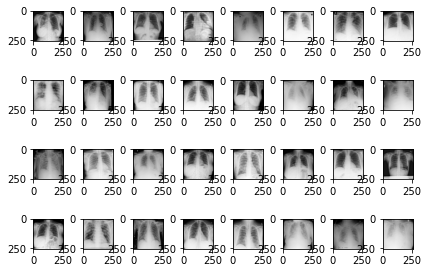

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ncols = 8
nrows = int(np.ceil(batch_size/ncols))


fig, axes = plt.subplots(nrows=4, ncols=4)
fig.tight_layout()

for i, img in enumerate(xrays):
  sp = plt.subplot(nrows, ncols, i + 1)
  plt.imshow(img, cmap='gray')
plt.show()